In [1]:
# import de la base de données excel

import pandas as pd

data_origin = pd.read_excel('sci.xlsx')
# Suppression des variables illégales
data = data_origin.drop(['CODPAY_NAISSANCE', 'CODPAY_NATIONALITE','CODPAY_RESIDENCE','CODSEXPRS','CODCMNIEE'], axis=1)

In [2]:
print(data.shape)
print(data.columns)

(495514, 62)
Index(['id_client', 'DDefaut_NDB', 'datdelhis', 'AGEPRS', 'ANCIENNETE',
       'CODETAJUR', 'CODITDBDF_PRO', 'CODNAF2', 'CODTYPPRS',
       'CRTAD_AG_MVTAFF_IND_0010', 'CRTAD_AG_NBECR_A', 'CRTAD_AG_NBECR_B',
       'CRTAD_AG_NBJDE_BA', 'CRTAD_AG_NBJDE_BB', 'CRTAD_AG_NBJDE_BC',
       'CRTAD_AG_SOLDE_IND_0009', 'CRTAD_AG_SOLDE_T', 'CRTAD_AG_SOLDE_T1',
       'CRTAD_AG_SOLDE_T2', 'CRTAD_AG_SOLDE_T3', 'CRTAD_AG_SOLDE_T4',
       'CRTAD_IND_0015', 'CRTAD_IND_0038', 'CRTAD_IND_0062', 'CRTAD_IND_0205',
       'CRTAE_AG_SLDEPA', 'CRTAR_IND_0036', 'CRTOC_AG_LIGCRE_2T_IND_0009',
       'CRTOC_AG_LIGCRE_IND_0009', 'CRTOC_AG_LIGDEB_2T_IND_0015',
       'CRTOC_AG_LIGDEB_IND_0015', 'CRTOC_AG_MVTAFF_2T_IND_0010',
       'CRTOC_AG_MVTAFF_IND_0010', 'CRTOC_AG_NBJCRE_2T_IND_0009',
       'CRTOC_AG_NBJDEB_2T_IND_0015', 'CRTOC_AG_NBJDEB_IND_0015',
       'CRTOC_IND_0010', 'CRTOC_IND_0015', 'CRTOC_IND_0164', 'CRTOC_IND_0301',
       'CRTOC_MOY_MVTAFF_IND_0010', 'CRTOC_SLD_MOY', 'CRTOD_CMT_IND

In [5]:
data.dtypes

id_client                        int64
DDefaut_NDB                      int64
datdelhis                        int64
AGEPRS                           int64
ANCIENNETE                       int64
                             ...      
DATCREPRSENT            datetime64[ns]
IND_ACTIF                        int64
IND_PER_PM                      object
secteur_activite                object
secteur_activite_bis            object
Length: 62, dtype: object

In [7]:
print(data['datdelhis'].nunique())
data['datdelhis'] = pd.to_datetime(data['datdelhis'], format = '%Y%m')

6


In [8]:
data.dtypes

id_client                        int64
DDefaut_NDB                      int64
datdelhis               datetime64[ns]
AGEPRS                           int64
ANCIENNETE                       int64
                             ...      
DATCREPRSENT            datetime64[ns]
IND_ACTIF                        int64
IND_PER_PM                      object
secteur_activite                object
secteur_activite_bis            object
Length: 62, dtype: object

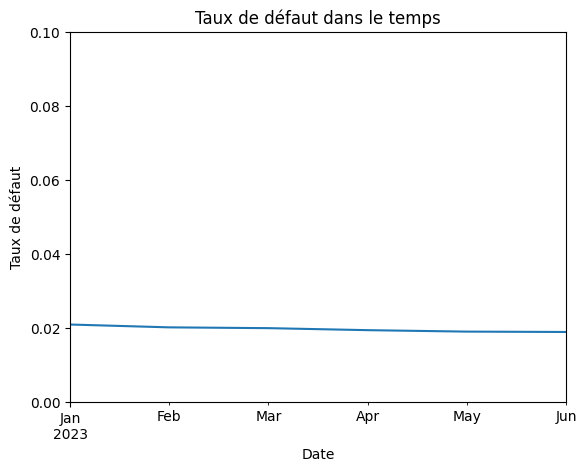

In [14]:
# Evolution de la variable cible dans le temps
import matplotlib.pyplot as plt

taux_cible = data.groupby(data['datdelhis'].dt.to_period('M'))['DDefaut_NDB'].mean() # ou sum()

# Tracer le taux de la variable cible au fil du temps
taux_cible.plot(title='Taux de défaut dans le temps')
plt.xlabel('Date')
plt.ylabel('Taux de défaut')
plt.ylim(0,0.1)
plt.show()

In [15]:
cible = "DDefaut_NDB"
data[cible].value_counts(normalize=True)

DDefaut_NDB
0    0.980374
1    0.019626
Name: proportion, dtype: float64

In [ ]:
## Creation des echantillons train et test 
from sklearn.model_selection import train_test_split

X = data.drop(columns = [cible])
y = data[cible]
X['stratify_col'] = data[cible].astype(str) + '_' + data['datdelhis'].astype(str)


# Split train-test stratifié en utilisant la colonne combinée
X_train, X_test, y_train, y_test = train_test_split(
    X,  # Les features incluant la date si elle est utilisée comme feature
    y,                 # La variable cible
    stratify=X['stratify_col'],  # La nouvelle colonne pour la stratification
    test_size=0.3,                # La proportion de l'ensemble de test
    random_state=42               # La graine pour la reproductibilité
)


In [19]:
X_train = X_train.drop(['stratify_col'], axis=1)
X_test = X_test.drop(['stratify_col'], axis=1)

In [3]:
# count na values by columns
print(data.isna().sum())

id_client                  0
DDefaut_NDB                0
datdelhis                  0
AGEPRS                     0
ANCIENNETE                 0
                        ... 
DATCREPRSENT            4665
IND_ACTIF                  0
IND_PER_PM                 0
secteur_activite           0
secteur_activite_bis       0
Length: 62, dtype: int64


In [4]:
# Vérification des doublons par ligne dans la base de données
print(data.duplicated().sum())

0


In [ ]:
data_transposed = data.T
data_transposed.shape
#print(data_transposed.duplicated().sum())

In [ ]:
column_to_compare = data [""]

(62, 495514)